In [1]:
import cv2
import os
import matplotlib.pyplot as plt 
os.environ["QT_QPA_PLATFORM"] = "xcb"
image = cv2.imread('Bs.jpeg')

In [2]:
#cv2.imshow("Anime", image)
#cv2.waitKey(0)

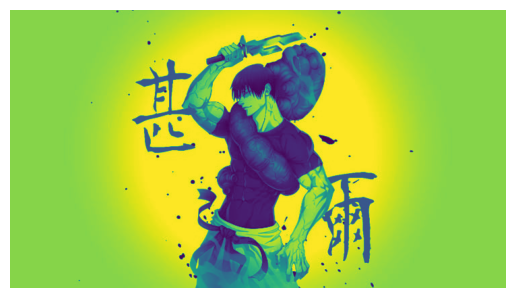

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray) 
plt.axis('off')   
plt.show()

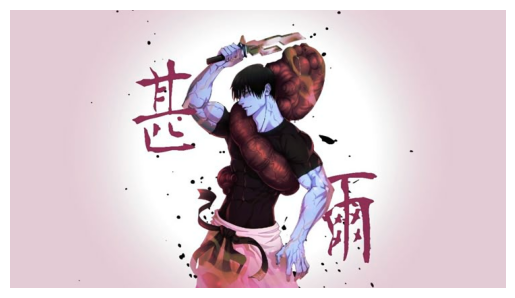

In [4]:
plt.imshow(image) 
plt.axis('off')  # Optionnel : pour ne pas aEicher les axes 
plt.show()

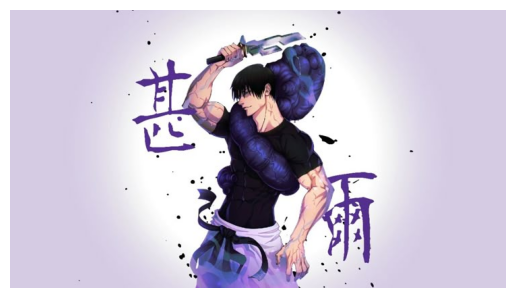

In [5]:
# Convertir l'image de BGR à RGB 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
 
# AEicher l'image dans le notebook 
plt.imshow(image_rgb) 
plt.axis('off')  # Optionnel : pour ne pas aEicher les axes 
plt.show()

In [6]:
image_rgb.shape

(413, 736, 3)

In [7]:
hauteur, largeur, canaux = image.shape
print(f"Dimensions de l'image : {largeur}x{hauteur}, Canaux : {canaux}")

Dimensions de l'image : 736x413, Canaux : 3


In [8]:
centre_x, centre_y = largeur // 2, hauteur // 2
pixel_centre = image[centre_y, centre_x]
print(f"Valeur du pixel au centre ({centre_x}, {centre_y}) : {pixel_centre}")

Valeur du pixel au centre (368, 206) : [189  79  79]


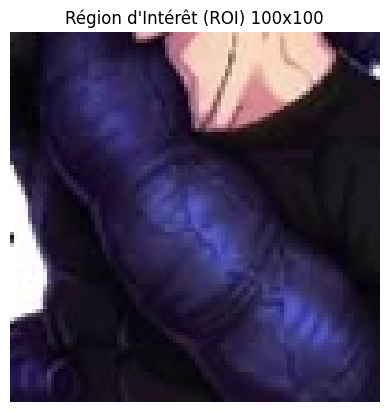

In [9]:
if image is None:
    print("Erreur : l'image n'a pas été trouvée.")
else:
    hauteur, largeur, _ = image.shape

    # Trouver le pixel central
    centre_x, centre_y = largeur // 2, hauteur // 2

    # **Définir une région d’intérêt (ROI) de 100x100 pixels autour du centre**
    roi_size = 100
    x1, y1 = max(0, centre_x - roi_size // 2), max(0, centre_y - roi_size // 2)
    x2, y2 = min(largeur, centre_x + roi_size // 2), min(hauteur, centre_y + roi_size // 2)

    roi = image[y1:y2, x1:x2]  # Extraire la ROI (OpenCV utilise [y1:y2, x1:x2])
    
    # Convertir la ROI en RGB pour l'affichage avec Matplotlib
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # **Afficher la région d'intérêt avec Matplotlib**
    plt.imshow(roi_rgb)
    plt.title("Région d'Intérêt (ROI) 100x100")
    plt.axis("off")  # Cacher les axes
    plt.show()


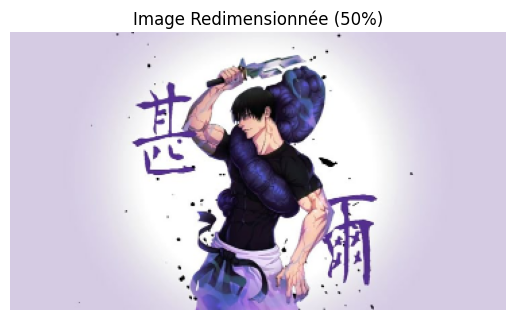

In [10]:
if image is None:
    print("Erreur : l'image n'a pas été trouvée.")
else:
    
    hauteur, largeur, _ = image.shape

    
    nouvelle_largeur, nouvelle_hauteur = largeur // 2, hauteur // 2
    image_redimensionnee = cv2.resize(image, (nouvelle_largeur, nouvelle_hauteur))

    
    image_redimensionnee_rgb = cv2.cvtColor(image_redimensionnee, cv2.COLOR_BGR2RGB)

    
    plt.imshow(image_redimensionnee_rgb)
    plt.title("Image Redimensionnée (50%)")
    plt.axis("off")  
    plt.show()

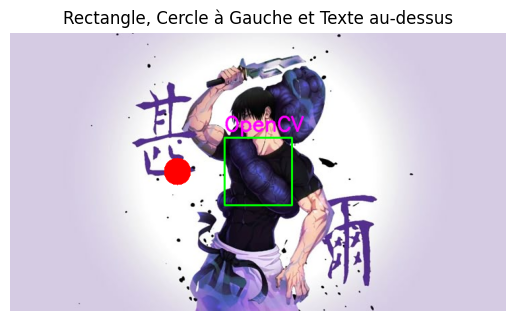

In [11]:

if image is None:
    print("Erreur : l'image n'a pas été trouvée.")
else:

    hauteur, largeur, _ = image.shape

    centre_x, centre_y = largeur // 2, hauteur // 2
    roi_size = 100
    x1, y1 = max(0, centre_x - roi_size // 2), max(0, centre_y - roi_size // 2)
    x2, y2 = min(largeur, centre_x + roi_size // 2), min(hauteur, centre_y + roi_size // 2)

    image_rectangle = image.copy()  
    cv2.rectangle(image_rectangle, (x1, y1), (x2, y2), (0, 255, 0), 2) 

    circle_x = x1 - 70  
    circle_y = (y1 + y2) // 2  
    cv2.circle(image_rectangle, (circle_x, circle_y), 20, (0, 0, 255), -1)  

    text_x = x1  
    text_y = y1 - 10  
    cv2.putText(image_rectangle, "OpenCV", (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255, 0, 255), 2, cv2.LINE_AA)

    image_finale_rgb = cv2.cvtColor(image_rectangle, cv2.COLOR_BGR2RGB)
    plt.imshow(image_finale_rgb)
    plt.title("Rectangle, Cercle à Gauche et Texte au-dessus")
    plt.axis("off")  
    plt.show()


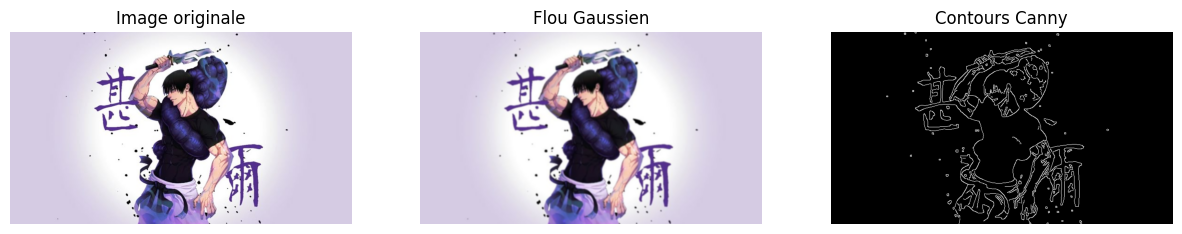

In [12]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Détecter les contours avec Canny
edges = cv2.Canny(blurred, 100, 200)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_rgb)
axes[0].set_title("Image originale")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axes[1].set_title("Flou Gaussien")
axes[1].axis("off")

axes[2].imshow(edges, cmap="gray")
axes[2].set_title("Contours Canny")
axes[2].axis("off")

plt.show()

In [13]:
cv2.imwrite("flou_gaussien.jpg", blurred)
cv2.imwrite("contours_canny.jpg", edges)

True